In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("multiclass_spiral_dataset.csv")
df.head()

,X1,X2,X3,y
0,0.000000,0.000000,-0.054821,0
1,-0.002426,0.009805,-0.112822,0
2,0.002723,0.020018,0.163735,0
3,0.006808,0.029528,0.078218,0
4,0.001973,0.040356,0.007372,0


In [3]:
df.shape

(300, 4)

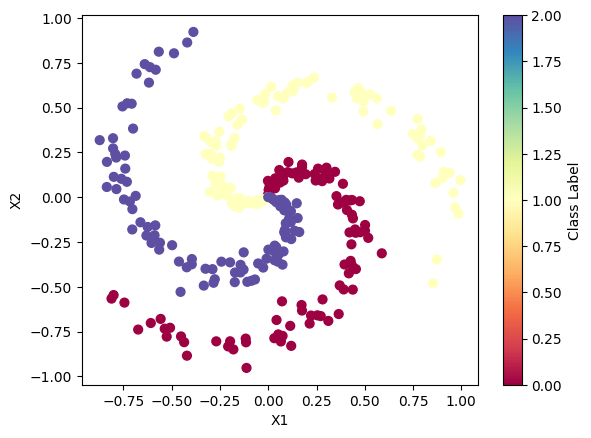

In [4]:

plt.scatter(df['X1'], df['X2'], c=df['y'], cmap=plt.cm.Spectral, s=40)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Class Label')
plt.show()

# Convert all columns except the last one to a NumPy array and assign to X
X = df.iloc[:, :-1].to_numpy()
# Convert the last column to a NumPy array and assign to y
y = df.iloc[:, -1].to_numpy()


In [5]:

class NN:
    def __init__(self, n_features, n_hiddens, n_classes) -> None:
        self.d = n_features
        self.h = n_hiddens
        self.n = n_classes
        self.w1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1, self.h))
        self.w2 = 0.01 * np.random.randn(self.h, self.n)
        self.b2 = np.zeros((1, self.n))

    def fwd_prop(self, X):
        z1 = np.dot(X, self.w1) + self.b1
        A1 = np.maximum(0, z1)
        z2 = np.dot(A1, self.w2) + self.b2
        z2 = np.exp(z2)
        A2 = z2 / np.sum(z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples), y])
        loss = np.sum(correct_logprobs) / num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        num_examples = y.shape[0]
        dz2 = A2
        dz2[range(num_examples), y] -= 1
        dz2 /= num_examples
        dw2 = np.dot(A1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dA1 = np.dot(dz2, self.w2.T)
        dA1[A1 <= 0] = 0
        dw1 = np.dot(X.T, dA1)
        db1 = np.sum(dA1, axis=0, keepdims=True)
        return dw1, db1, dw2, db2

    def fit(self, X, y, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            # Forward prop
            A1, A2 = self.fwd_prop(X)

            # Calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5 * reg * (np.sum(self.w1 * self.w1) + np.sum(self.w2 * self.w2))
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print(f"Iteration {i}: Loss {loss}")

            # Backpropagation
            dw1, db1, dw2, db2 = self.back_prop(X, A1, A2, y)

            # Add regularization gradients
            dw2 += reg * self.w2
            dw1 += reg * self.w1

            # Parameter update
            self.w1 -= lr * dw1
            self.b1 -= lr * db1
            self.w2 -= lr * dw2
            self.b2 -= lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.w1) + self.b1)
        Z2 = np.dot(A1, self.w2) + self.b2
        y_hat = np.argmax(Z2, axis=1)
        return y_hat


In [1]:
# https://chatgpt.com/c/6788eda9-af38-8006-a6eb-53f5829e15dd

In [6]:

class NN:
    def __init__(self, n_features, n_hiddens, n_classes) -> None:
        self.d = n_features
        self.h = n_hiddens
        self.n = n_classes
        self.w1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1, self.h))
        self.w2 = 0.01 * np.random.randn(self.h, self.n)
        self.b2 = np.zeros((1, self.n))

    def fwd_prop(self, X):
        z1 = np.dot(X, self.w1) + self.b1
        A1 = np.maximum(0, z1)
        z2 = np.dot(A1, self.w2) + self.b2
        exp_scores = np.exp(z2)
        A2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        corect_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(corect_logprobs) / num_examples
        return data_loss

    def back_prop(self, X, A1, A2, y):
        num_examples = y.shape[0]
        dz2 = A2
        dz2[range(num_examples), y] -= 1
        dz2 /= num_examples
        dw2 = np.dot(A1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dA1 = np.dot(dz2, self.w2.T)
        dz1 = np.array(dA1, copy=True)
        dz1[A1 <= 0] = 0
        dw1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        return dw1, db1, dw2, db2

    def fit(self, X, y, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            # Forward prop
            A1, A2 = self.fwd_prop(X)

            # Calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5 * reg * (np.sum(self.w1 * self.w1) + np.sum(self.w2 * self.w2))
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print(f"Iteration {i}: Loss {loss}")

            # Backpropagation
            dw1, db1, dw2, db2 = self.back_prop(X, A1, A2, y)

            # Add regularization gradients
            dw2 += reg * self.w2
            dw1 += reg * self.w1

            # Parameter update
            self.w1 += -lr * dw1
            self.b1 += -lr * db1
            self.w2 += -lr * dw2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.w1) + self.b1)
        Z2 = np.dot(A1, self.w2) + self.b2
        y_hat = np.argmax(Z2, axis=1)
        return y_hat

# %%

In [ ]:
import numpy as np

class OptimizedNeuralNetwork:
    def __init__(self, input_size, hidden_layer_size, output_size):
        """
        Initialize the neural network with given sizes for input, hidden, and output layers.
        """
        # Input layer to hidden layer weights and bias
        self.input_size = input_size  # Number of features in input
        self.hidden_layer_size = hidden_layer_size  # Number of neurons in hidden layer
        self.output_size = output_size  # Number of output classes

        # Weights and biases initialization
        self.weights_input_to_hidden = 0.01 * np.random.randn(self.input_size, self.hidden_layer_size)  # Weight matrix for input to hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_layer_size))  # Bias for hidden layer

        self.weights_hidden_to_output = 0.01 * np.random.randn(self.hidden_layer_size, self.output_size)  # Weight matrix for hidden to output layer
        self.bias_output = np.zeros((1, self.output_size))  # Bias for output layer

    def forward_propagation(self, input_data):
        """
        Perform forward propagation to calculate activations for both layers.
        """
        # Hidden layer pre-activation (Z1)
        hidden_layer_pre_activation = np.dot(input_data, self.weights_input_to_hidden) + self.bias_hidden
        # Hidden layer activation (ReLU)
        hidden_layer_activation = np.maximum(0, hidden_layer_pre_activation)  # ReLU activation function
        
        # Output layer pre-activation (Z2)
        output_layer_pre_activation = np.dot(hidden_layer_activation, self.weights_hidden_to_output) + self.bias_output
        # Softmax for output layer to get probabilities
        exp_scores = np.exp(output_layer_pre_activation)
        output_layer_activation = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax normalization
        
        return hidden_layer_activation, output_layer_activation

    def compute_loss(self, true_labels, predicted_probabilities):
        """
        Compute the Categorical Cross-Entropy Loss.
        """
        num_samples = true_labels.shape[0]  # Number of samples
        correct_class_probabilities = predicted_probabilities[range(num_samples), true_labels]  # Get probabilities of true classes
        log_correct_class_probabilities = -np.log(correct_class_probabilities)  # Negative log for correct classes
        data_loss = np.sum(log_correct_class_probabilities) / num_samples  # Average loss
        
        return data_loss

    def backpropagate(self, input_data, hidden_layer_activation, output_layer_activation, true_labels, regularization_strength):
        """
        Perform backpropagation to compute gradients of the loss with respect to the weights and biases.
        """
        num_samples = true_labels.shape[0]
        
        # Gradient for output layer
        output_layer_gradient = output_layer_activation
        output_layer_gradient[range(num_samples), true_labels] -= 1  # Subtract 1 from the predicted class (cross-entropy gradient)
        output_layer_gradient /= num_samples  # Average the gradient

        # Gradients for weights and biases (hidden to output)
        gradients_weights_hidden_to_output = np.dot(hidden_layer_activation.T, output_layer_gradient)
        gradients_bias_output = np.sum(output_layer_gradient, axis=0, keepdims=True)

        # Backpropagate to the hidden layer
        hidden_layer_gradient = np.dot(output_layer_gradient, self.weights_hidden_to_output.T)
        hidden_layer_gradient[hidden_layer_activation <= 0] = 0  # ReLU derivative: Set negative gradients to 0
        
        # Gradients for weights and biases (input to hidden)
        gradients_weights_input_to_hidden = np.dot(input_data.T, hidden_layer_gradient)
        gradients_bias_hidden = np.sum(hidden_layer_gradient, axis=0, keepdims=True)

        # Add regularization to the gradients
        gradients_weights_hidden_to_output += regularization_strength * self.weights_hidden_to_output
        gradients_weights_input_to_hidden += regularization_strength * self.weights_input_to_hidden
        
        return gradients_weights_input_to_hidden, gradients_bias_hidden, gradients_weights_hidden_to_output, gradients_bias_output

    def train(self, input_data, true_labels, learning_rate, regularization_strength, num_iterations):
        """
        Train the neural network using gradient descent.
        """
        for iteration in range(num_iterations):
            # Perform forward propagation
            hidden_layer_activation, output_layer_activation = self.forward_propagation(input_data)
            
            # Calculate the loss
            data_loss = self.compute_loss(true_labels, output_layer_activation)
            regularization_loss = 0.5 * regularization_strength * (
                np.sum(self.weights_input_to_hidden**2) + np.sum(self.weights_hidden_to_output**2)
            )  # L2 regularization loss
            total_loss = data_loss + regularization_loss
            
            # Print the loss every 1000 iterations
            if iteration % 1000 == 0:
                print(f"Iteration {iteration}: Total Loss = {total_loss}")
            
            # Perform backpropagation to get gradients
            gradients_weights_input_to_hidden, gradients_bias_hidden, gradients_weights_hidden_to_output, gradients_bias_output = self.backpropagate(
                input_data, hidden_layer_activation, output_layer_activation, true_labels, regularization_strength
            )
            
            # Update the parameters using gradient descent
            self.weights_input_to_hidden -= learning_rate * gradients_weights_input_to_hidden
            self.bias_hidden -= learning_rate * gradients_bias_hidden
            self.weights_hidden_to_output -= learning_rate * gradients_weights_hidden_to_output
            self.bias_output -= learning_rate * gradients_bias_output

    def predict(self, input_data):
        """
        Predict the class labels for new input data using the trained model.
        """
        _, output_layer_activation = self.forward_propagation(input_data)
        predicted_class_labels = np.argmax(output_layer_activation, axis=1)  # Get the index of the class with the highest probability
        return predicted_class_labels


In [1]:
# nn_model = NN(n_features=2, n_hiddens=100, n_classes=3)
# nn_model.fit(X, y, lr=1, reg=1e-3, max_iters=10000)
# print('training accuracy: {:.2f}%'.format(np.mean(nn_model.predict(X) == y)))

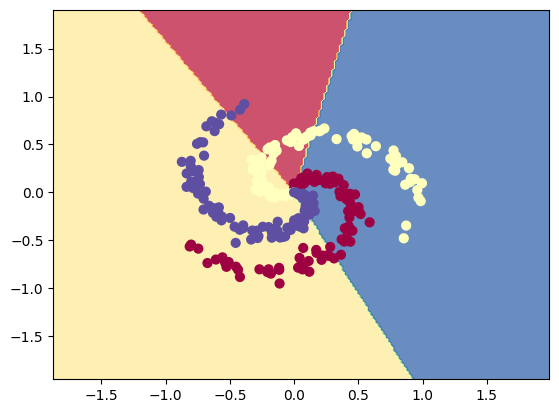

In [8]:
# create a 2D grid
step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()

plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# Keras Sequential API
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

2.17.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

print(X.shape)
print(y.shape)

# (300, 2)
# (300,)

print(y)

(300, 3)
(300,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [11]:
from tensorflow.keras.utils import to_categorical

y_OHE = to_categorical(y)

print(y_OHE)

tf.config.run_functions_eagerly(True)
history = model.fit(X, y_OHE, epochs=10, batch_size=256)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (256, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(256, 3), dtype=float32)
  • training=True
  • mask=None